<a href="https://colab.research.google.com/github/o-bissing/blood_cell_segmentation/blob/main/Image_segmentation3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [8]:
img = cv2.imread("/content/002f20ad-2ace-499c-9335-c9080bc3e6b5.png")

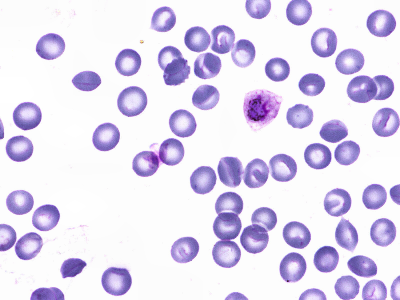

In [9]:
from google.colab.patches import cv2_imshow
resized_image = cv2.resize(img, (400,300))
cv2_imshow(resized_image)

In [10]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [11]:
# Threshhold + Otsu algorithm
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

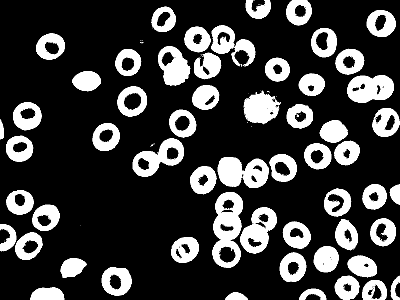

In [12]:
resized_image = cv2.resize(thresh, (400,300))
cv2_imshow(resized_image)

In [13]:
# Noise removal
kernel = np.ones((3,3),np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [14]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

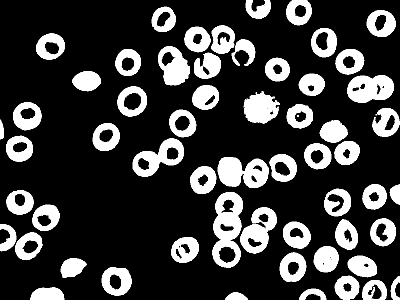

In [15]:
resized_image = cv2.resize(opening, (400,300))
cv2_imshow(resized_image)

In [16]:
# Filling the holes
test = opening.copy()

In [17]:
th,im_th = cv2.threshold(test,220,255,cv2.THRESH_BINARY_INV)
im_floodfill = im_th.copy()
h,w = im_th.shape[:2]

In [18]:
mask = np.zeros((h+2,w+2), np.uint8)
cv2.floodFill(test,mask,(0,0),255)
im_floodfill_inv = cv2.bitwise_not(test)
im_out = im_floodfill_inv + opening.copy()

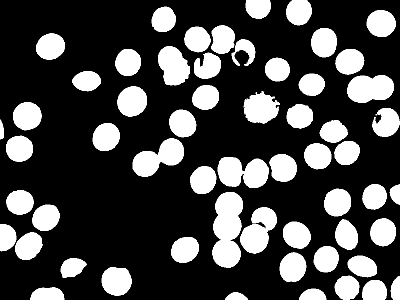

In [19]:
resized_image = cv2.resize(im_out, (400,300))
cv2_imshow(resized_image)

In [20]:
# Distance transformation
dist_transform = cv2.distanceTransform(im_out,cv2.DIST_L2,5)

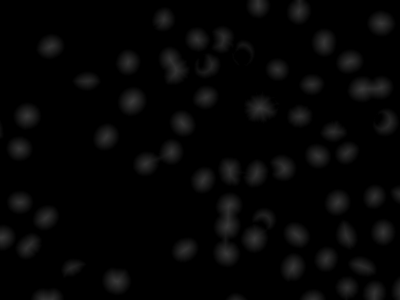

In [21]:
resized_image = cv2.resize(dist_transform, (400,300))
cv2_imshow(resized_image)

In [22]:
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)

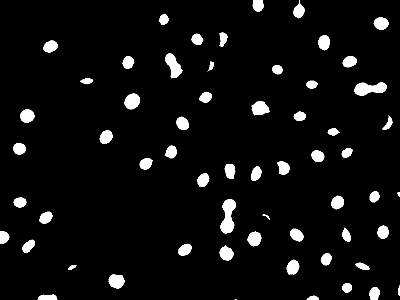

In [23]:
resized_image = cv2.resize(sure_fg, (400,300))
cv2_imshow(resized_image)

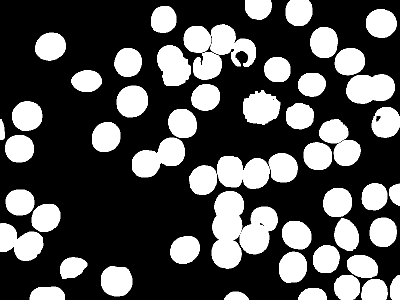

In [24]:
sure_bg = cv2.dilate(im_out,kernel,iterations=3)
resized_image = cv2.resize(sure_bg, (400,300))
cv2_imshow(resized_image)

In [25]:
sure_fg = np.uint8(sure_fg) # casting as an integer

In [26]:
unknown = cv2.subtract(sure_bg,sure_fg)

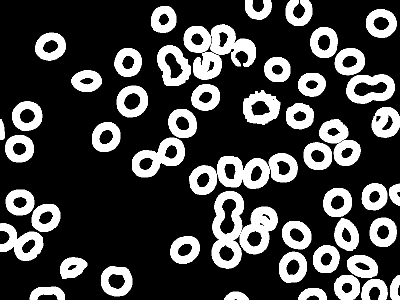

In [27]:
resized_image = cv2.resize(unknown, (400,300))
cv2_imshow(resized_image)

In [28]:
ret,markers = cv2.connectedComponents(sure_fg)

In [29]:
markers = markers + 1

In [30]:
markers[unknown==255] = 0

In [31]:
markers_normalized = cv2.normalize(markers, None, 0, 255, cv2.NORM_MINMAX)

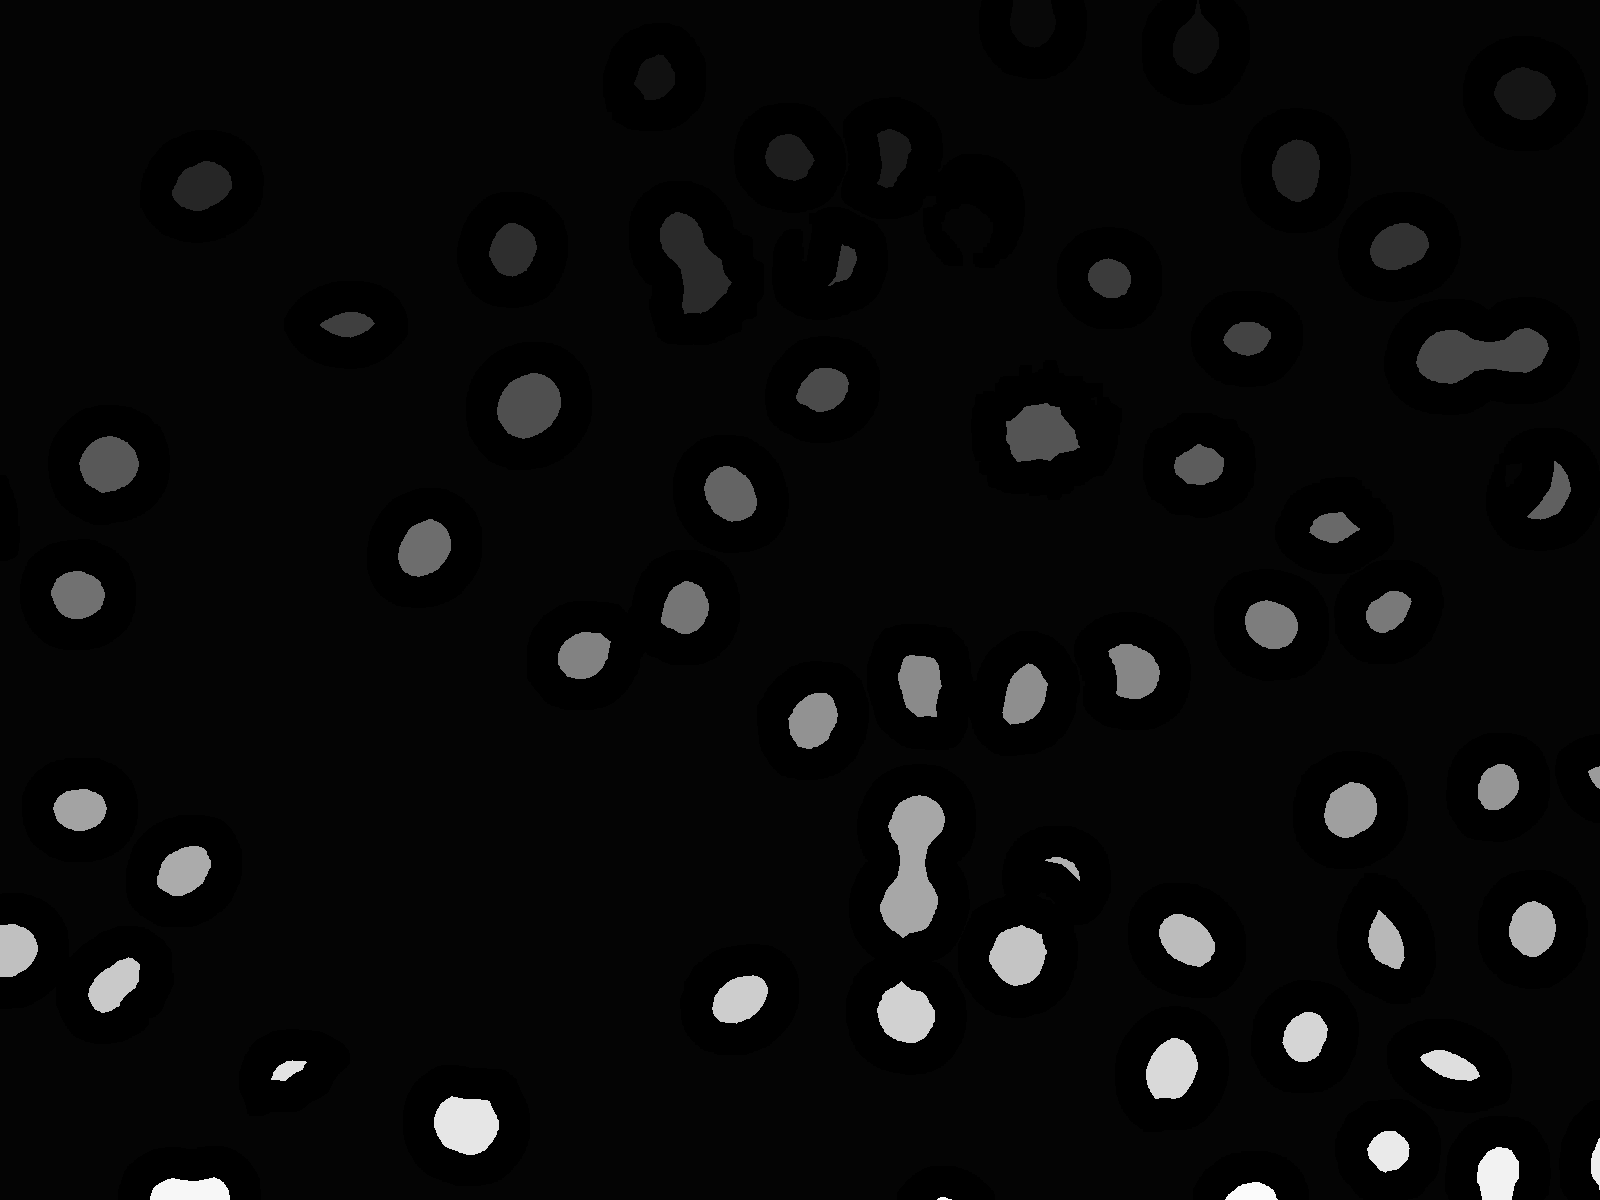

In [40]:
cv2_imshow(markers_normalized)

In [41]:
markers = cv2.watershed(img,markers)

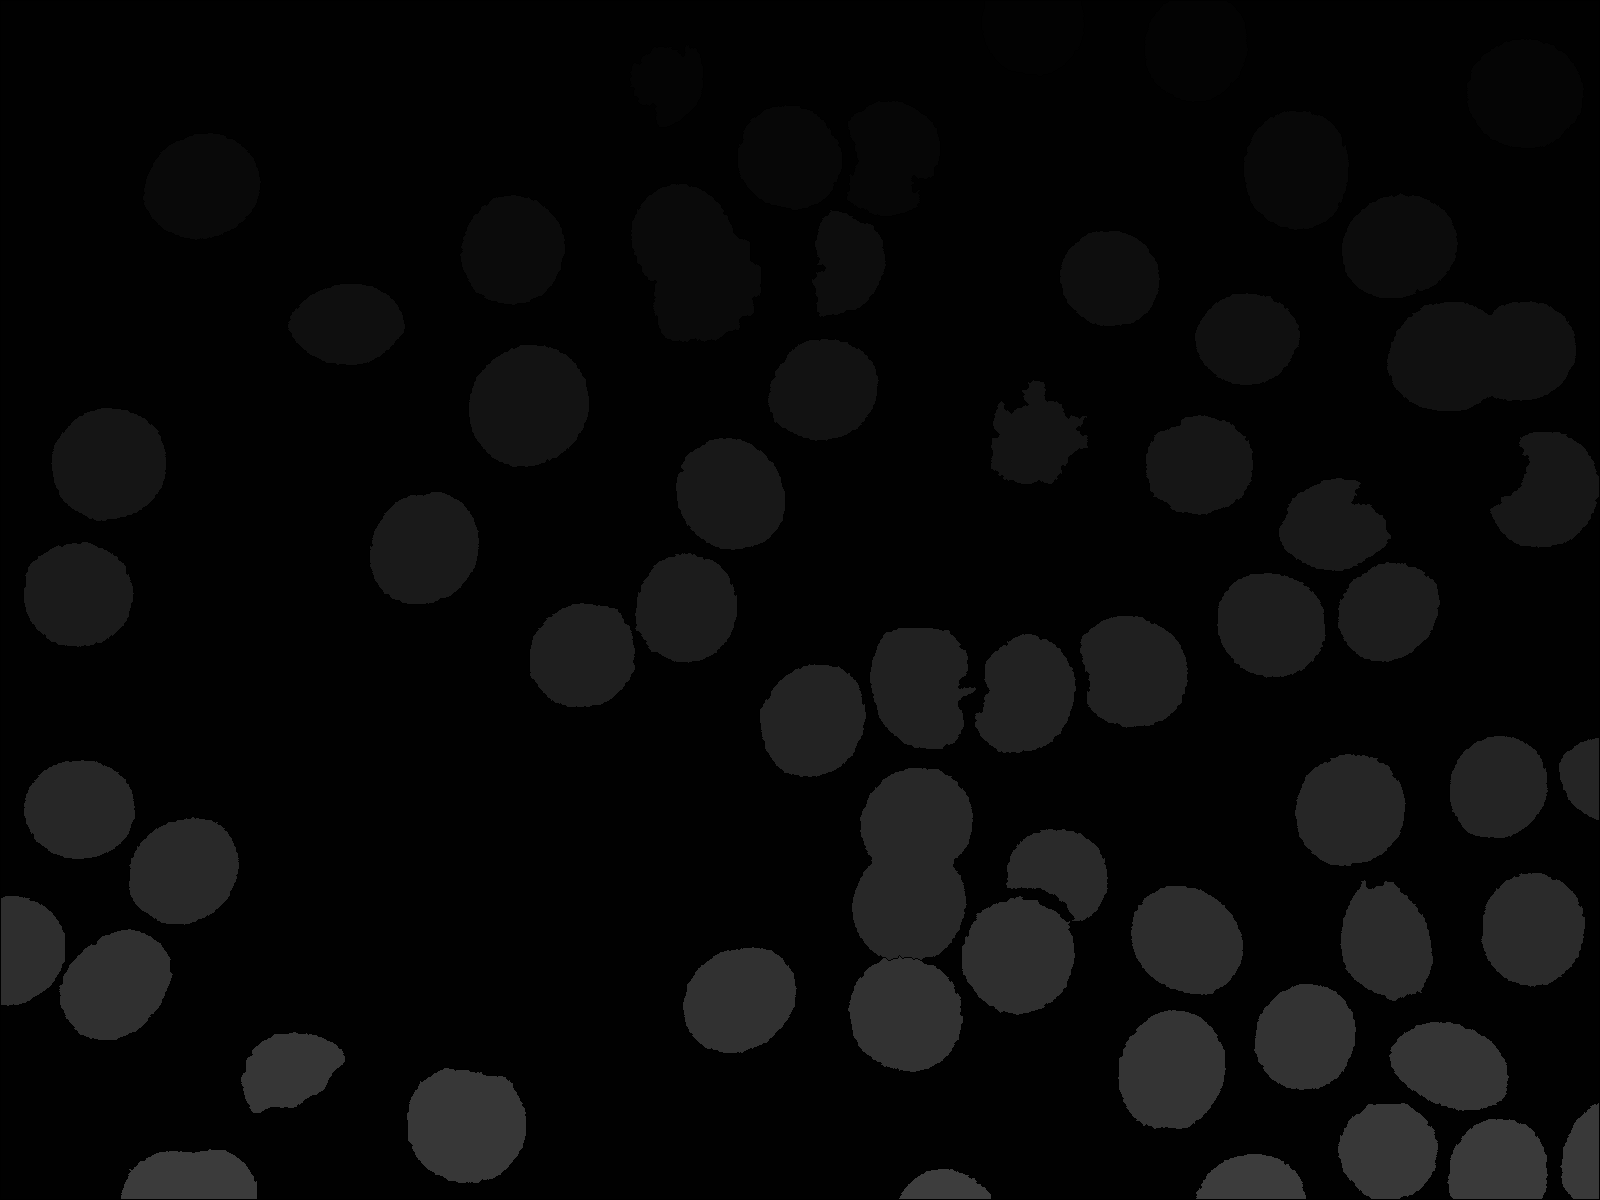

In [44]:
cv2_imshow(markers)

In [45]:
contours,hierarichy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
  if hierarichy[0][i][3] == -1:
    cv2.drawContours(img,contours,i,(255,0,0),10)

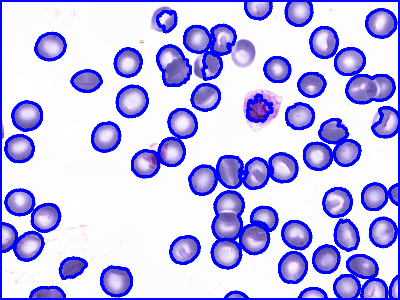

objects number is: 109
109


In [56]:
resized_image = cv2.resize(img, (400,300))
cv2_imshow(resized_image)
print('objects number is:', format(len(contours)))
print(len(contours))

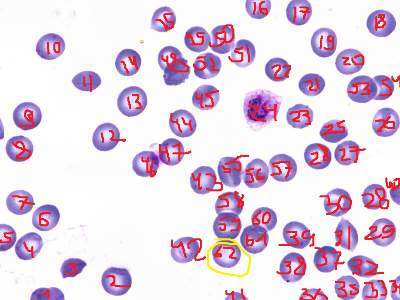

In [53]:
img2 = cv2.imread("/content/total.jpg")
resized_image = cv2.resize(img2, (400,300))
cv2_imshow(resized_image)

Algorithm was able to find 109 out of aprx. 62 cells, can't find the reason for that